In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load and Check Data

In [3]:
# Read data
netflix = pd.read_csv("netflix_titles.csv")

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Show_id : Unique ID for every Movie / Tv Show
1. Type : Identifier - A Movie or TV Show
1. Title : Title of the Movie / Tv Show
1. Director: Director of the Movie
1. Cast : Actors involved in the movie / show
1. Country : Country where the movie / show was produced 
1. Date_added : Date it was added on Netflix
1. Release_year :Actual Release year of the move / show
1. Rating: TV Rating of the movie / show
1. Duration: Total Duration - in minutes or number of seasons
1. Listed_in : Genre
1. Description: The summary description

In [8]:
netflix_shows=netflix[netflix['type']=='TV Show']

In [9]:
netflix_movies=netflix[netflix['type']=='Movie']

In [11]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Data Cleaning

### Find Missing Values

In [13]:
#Checking for null values
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
#Checking for unique values
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In order to visualize missing data, we can use :
* sns.heatmap 

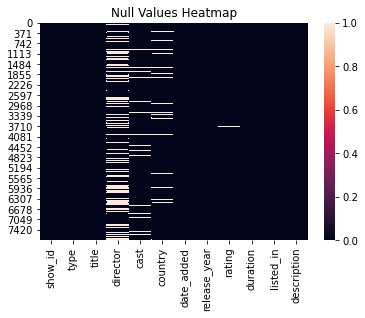

In [18]:
sns.heatmap(netflix.isnull())
plt.title('Null Values Heatmap')
plt.show()

There are a below columns that contain null values:- <br> 
1.'director',<br>
2.'cast',<br>
3.'country', <br>
4.'date_added', <br>
5.'rating'.<br>

## Fill Missing Values

<ul>
    <li>Drop id column</li>
    <li>For the missing rows in date_added column, replace them by January 1,{release_year}</li>
    <li>We have 10 missing values in rating column, replace them with TV-MA which is the most common rating</li>
    <li>For the missing values in country, replace them with United States.Instead of removing the entire column, we chose to fill in the missing values in this way to avoid losing data. 
    <li>Drop the director and cast columns completely. We are only focused on visualizing this data hence dropping two columns wont be any trouble for us.But this should not be a regular practise as if we are making a recommender system, we cannot drop the director and cast of a movie as these are a key feature used to recommend movies to users.    
</ul>

In [19]:
# drop id column
netflix.drop('show_id',axis=1, inplace = True)

In [21]:
# Replace nan values in data_added with January 1,{release_year}
netflix['date_added']=netflix['date_added'].fillna('January 1, {}'.format(str(netflix['release_year'].mode()[0])))

In [22]:
netflix['date_added'].isnull().sum() 

0

In [23]:
netflix["release_month"] = netflix['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


In [24]:
netflix['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [25]:
#  Replace nan values in rating with TV-MA
netflix['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [26]:
netflix['country'].value_counts()

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
Israel, Germany, France                      1
United States, Canada, Ireland               1
United Kingdom, Singapore                    1
Canada, Germany, France, United States       1
Canada, Belgium                              1
Name: country, Length: 681, dtype: int64

In [27]:
# Replace nan values in country with United States
netflix['country'].replace(np.nan, 'United States',inplace  = True)

In [28]:
# Drop the director and cast columns completely.
netflix.drop(['director','cast'],axis=1, inplace = True)

In [29]:
netflix.isnull().sum()

type             0
title            0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

In [30]:
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


# Visualization

### Analysis of Movies vs TV Shows.

Movie      5377
TV Show    2410
Name: type, dtype: int64


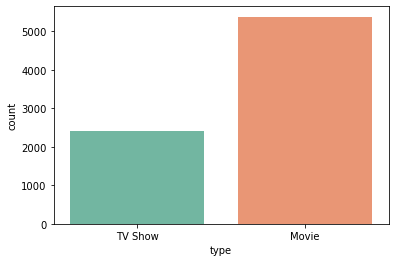

In [55]:
print(netflix.type.value_counts())
sns.countplot(netflix.type,palette="Set2")
plt.show()

### Analysis of Ratings

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


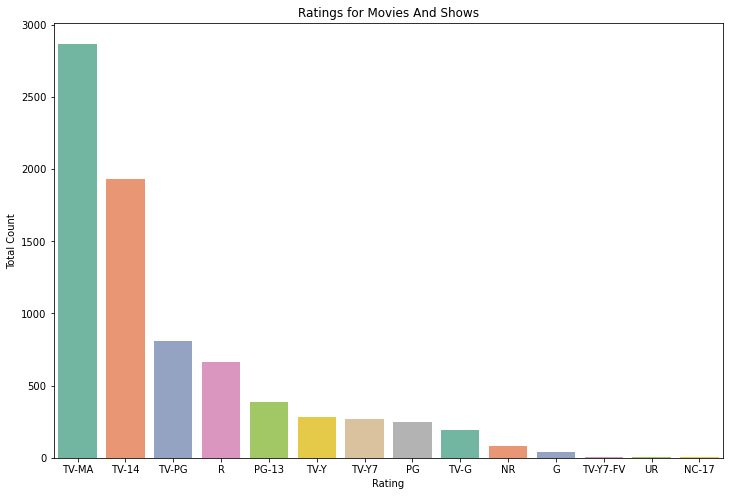

In [56]:
rating_counts = netflix.rating.value_counts()
print(rating_counts)
plt.figure(figsize = (12,8))
sns.countplot(netflix.rating, order = rating_counts.index[0:15],palette="Set2")
plt.title("Ratings for Movies And Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

> 1 -Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences.
> 
> 2 -Programming rated TV-14 in the United States TV Parental Guidelines signifies content with parents strongly cautioned. Content may be inappropriate for children younger than 14 years of age.
> 
> 3 -An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

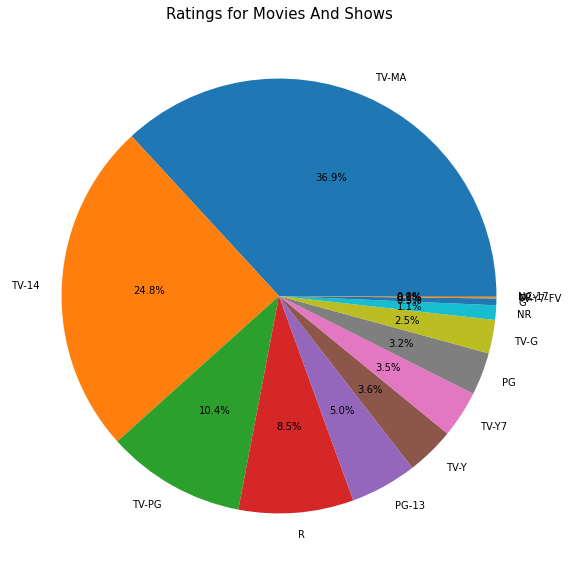

In [57]:
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = rating_counts.values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Ratings for Movies And Shows',fontsize = 15)
plt.show()

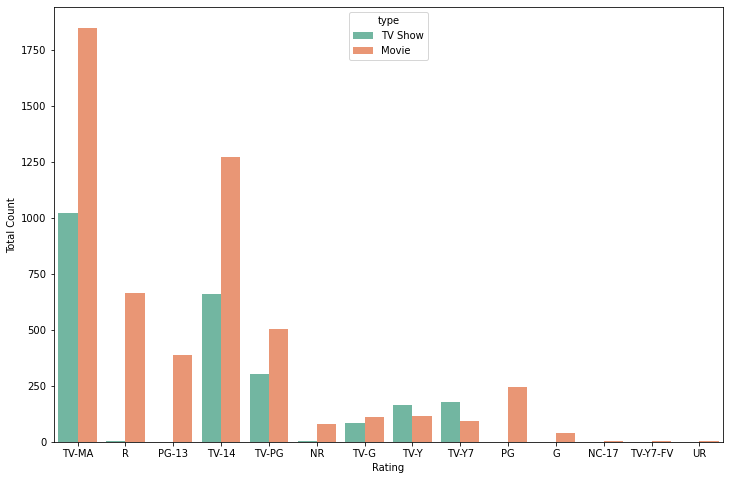

In [58]:
#Type - rating 
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix,hue='type',palette="Set2")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

### Year wise analysis

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64


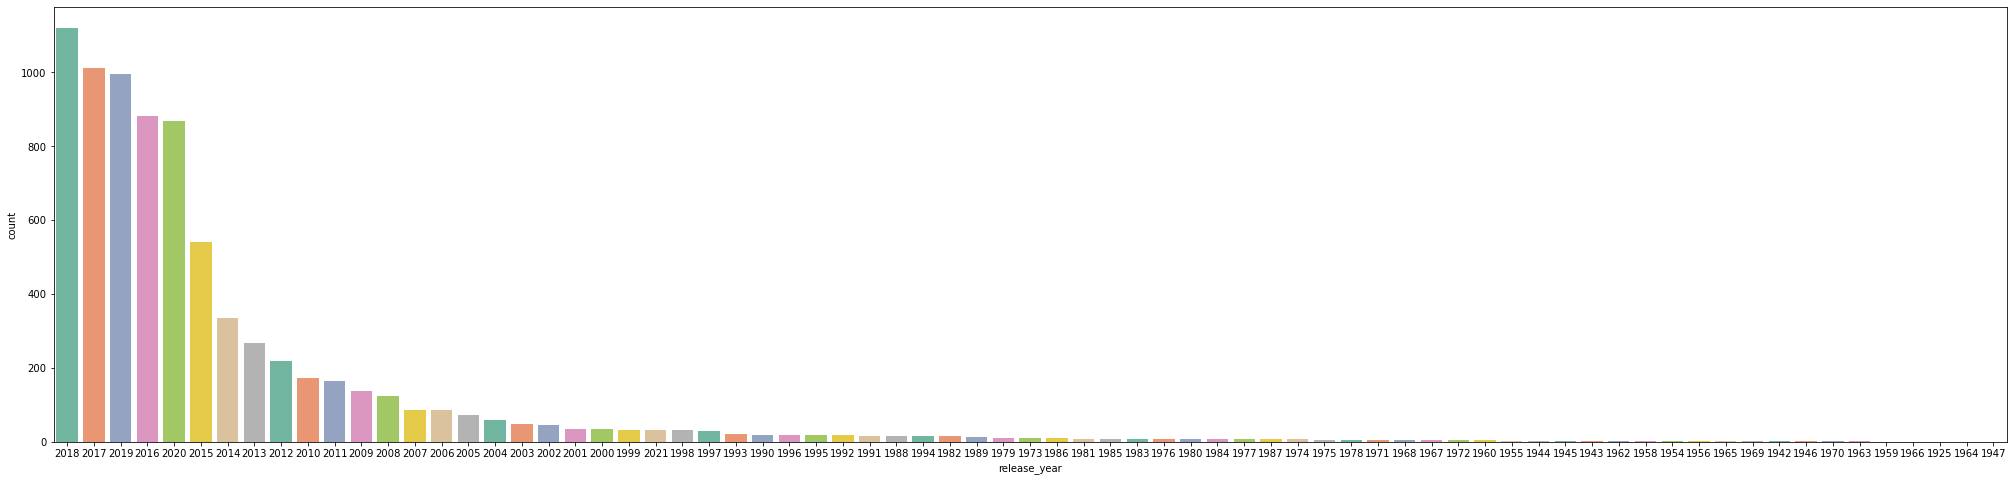

In [61]:
release_year_counts = netflix.release_year.value_counts()
print(release_year_counts)
plt.figure(figsize = (35,8))
sns.countplot(netflix.release_year, order = release_year_counts.index[0:94],palette="Set2")
plt.show()

> As we can see most of the movies and Tv shows on Netflix are released in 2018.Let's see which month directors prefer most to release their Movies & Tv Shows.

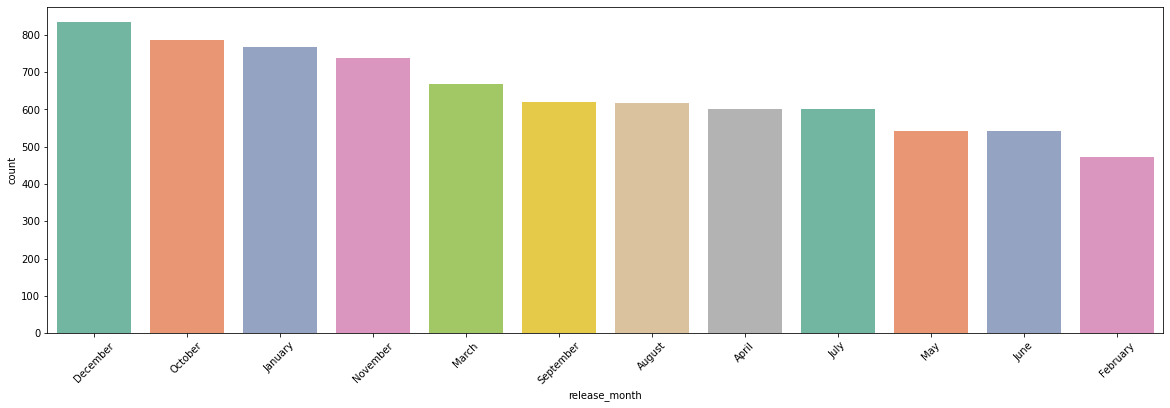

In [62]:
plt.figure(figsize=(20,6))
sns.countplot(x="release_month",data= netflix,order = netflix['release_month'].value_counts().index[0:12],palette="Set2")
plt.xticks(rotation=45)
plt.show()

### Countries with the most content available

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64


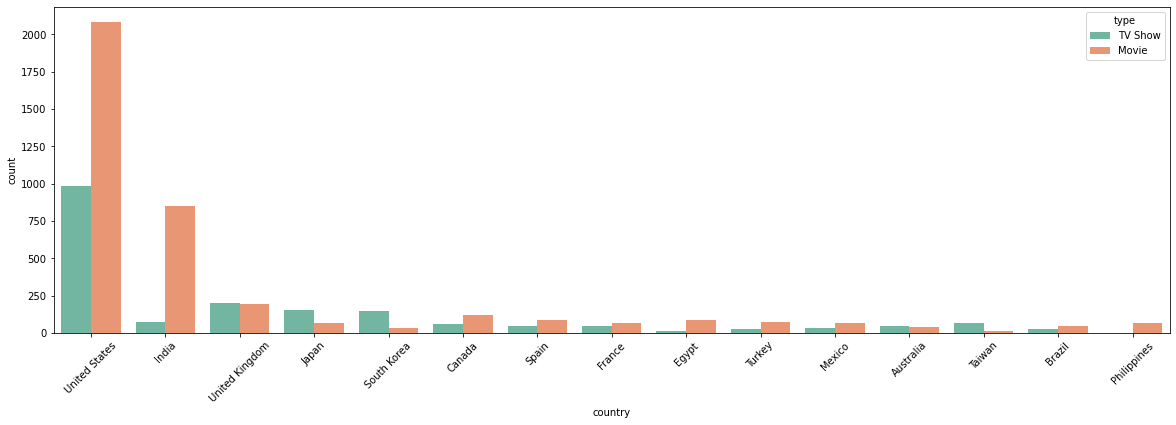

In [69]:
print(netflix["country"].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x="country",data= netflix,hue= "type",order = .index[0:15],palette="Set2")
plt.xticks(rotation=45)
plt.show()

> Unsurprisingly, the United States stands out because Netflix is an American company. India surprisingly ranks second in the film, followed by the UK.

### Top 10 Genres of Movies

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: listed_in, dtype: int64


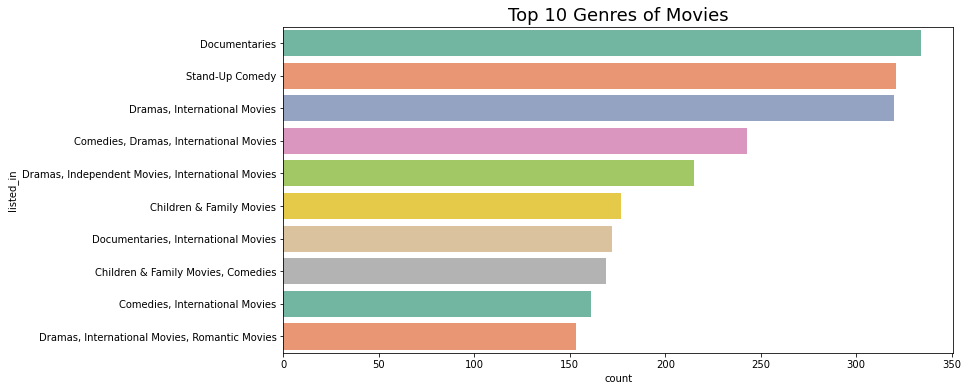

In [70]:
print(netflix_movies["listed_in"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in',data = netflix_movies,order =netflix_movies["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title("Top 10 Genres of Movies",size=18)
plt.show()


>Let's see the same thing in tv shows

### Top 10 Genres of Tv Shows

Kids' TV                                                      205
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          90
International TV Shows, Romantic TV Shows, TV Dramas           86
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Comedies         79
Anime Series, International TV Shows                           75
Docuseries                                                     74
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: listed_in, dtype: int64


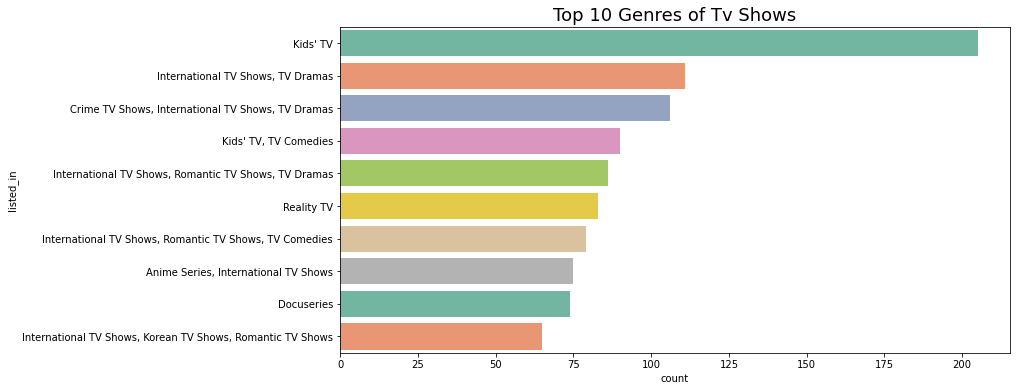

In [72]:
print(netflix_shows["listed_in"].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in',data = netflix_shows,order =netflix_shows["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title("Top 10 Genres of Tv Shows",size=18)
plt.show()


### Analysis of duration of movies and Tv Shows

In [73]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','').astype(int)
netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows.seasons = netflix_shows.seasons.str.replace(' Seasons','').astype(int)

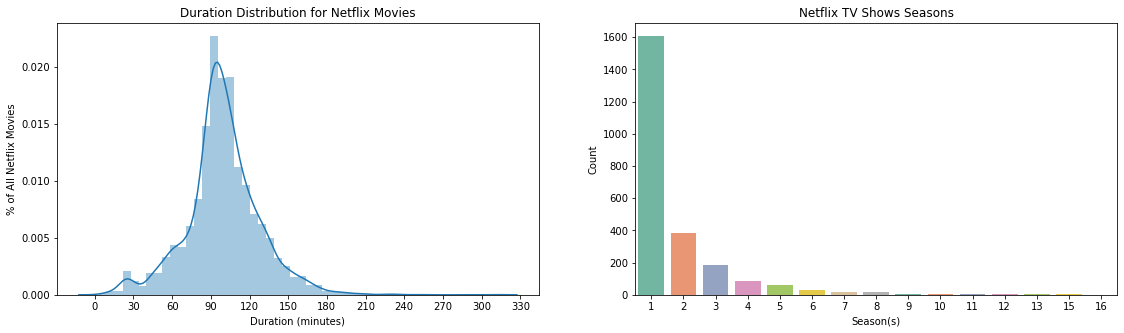

In [75]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(netflix_movies.duration,ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_shows.seasons,ax=ax[1],palette="Set2");
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

> As you can see, movies are usually between 75-120 minutes and TV shows are usually 1 season.

### Oldest movies available on netflix

In [76]:
oldest = netflix.sort_values("release_year", ascending = True) 
oldest[['title', "release_year"]][:10]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7616,Why We Fight: The Battle of Russia,1943
7268,Tunisian Victory,1944
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
5371,San Pietro,1945


### Standup shows on Netflix


In [78]:
standup=netflix[netflix["listed_in"] == "Stand-Up Comedy"]
standup[["title","country","release_year"]].head(10)

,title,country,release_year
220,A Russell Peters Christmas,Canada,2011
305,Adam Devine: Best Time of Our Lives,United States,2019
307,ADAM SANDLER 100% FRESH,United States,2018
310,Adel Karam: Live from Beirut,United States,2018
312,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
320,Afonso Padilha: Classless,Brazil,2020
344,Agustín Aristarán: Soy Rada,Argentina,2018
370,Alan Saldaña: Mi vida de pobre,Mexico,2017
375,Alejandro Riaño: Especial de stand up,Colombia,2018
378,Alex Fernández: The Best Comedian in the World,Mexico,2020


### Kids TV shows on Netflix

In [79]:
kids=netflix[netflix["listed_in"] == "Kids' TV"]
kids[["title","country","release_year"]].head(10)

,title,country,release_year
111,44 Cats,Italy,2018
276,Abby Hatcher,"United States, Canada",2019
434,Alphablocks,United Kingdom,2014
598,Ask the StoryBots,United States,2019
706,Bal Ganesh,United States,2019
735,Barbie Dreamhouse Adventures,"United States, Canada",2018
736,Barbie Dreamhouse Adventures: Go Team Roberts,United States,2020
760,Bat Pat,Italy,2016
779,Be-Be-Bears,Russia,2018
786,Beat Bugs,"Australia, Canada",2018
